## Adding the baselines to a dataframe

In [1]:
import numpy as np
from astropy.io import ascii
import glob
import pandas as pd
from tqdm import tqdm

In [2]:
bl = pd.read_csv('../../data/malatium.csv', usecols=['KIC'], index_col=None)
bl['bl'] = np.nan
bl.head(5)

,KIC,bl
0,1435467,NaN
1,2837475,NaN
2,3427720,NaN
3,3456181,NaN
4,3632418,NaN


In [3]:
for idx in tqdm(bl.index.values):
    kic = bl.loc[idx, 'KIC']
    file = glob.glob(f'../../data/*{kic}*.pow')[0]
    f = ascii.read(file)
    fs = np.median(np.diff(f['col1']))
    bl.loc[idx, 'bl'] = np.round((1/(fs*1e-6)) / 3600 / 24 / 365.25,2)

100%|██████████| 95/95 [35:26<00:00, 25.75s/it]


In [4]:
bl

,KIC,bl
0,1435467,3.14
1,2837475,3.14
2,3427720,3.14
3,3456181,1.79
4,3632418,3.14
5,3656476,3.14
6,3735871,3.14
7,4914923,3.14
8,5184732,2.63
9,5773345,1.53


In [5]:
bl.to_csv('baselines.csv')

## Reading in:

In [6]:
bl = pd.read_csv('baselines.csv')

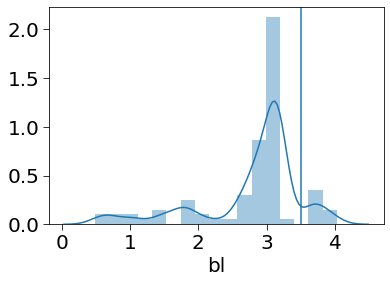

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(bl.bl)
plt.axvline(3.5);

In [10]:
bl[bl.bl<3.5].index.astype(int)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70,
            71, 72, 74, 75, 77, 78, 79, 81, 82, 85, 86, 87, 89, 90, 91, 92,
            93],
           dtype='int64')

In [ ]:
print(len(bl[bl.bl<3.5].index.astype(int)))